In [103]:
import pandas as pd
import numpy as np
import os

In [104]:
data = pd.read_csv('Dataset\\water_dataX.csv', encoding="ISO-8859-1")

In [105]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NaN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [106]:
data.fillna(0, inplace=True)

In [107]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,0,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [108]:
data['Temp'] = pd.to_numeric(data['Temp'], errors = 'coerce')
data['D.O. (mg/l)'] = pd.to_numeric(data['D.O. (mg/l)'], errors = 'coerce')
data['PH'] = pd.to_numeric(data['PH'], errors='coerce')
data['B.O.D. (mg/l)'] = pd.to_numeric(data['B.O.D. (mg/l)'], errors='coerce')
data['CONDUCTIVITY (µmhos/cm)'] = pd.to_numeric(data['CONDUCTIVITY (µmhos/cm)'], errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)'] = pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'], errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean'] = pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'], errors='coerce')

In [109]:
start = 1
end = 1779
station = data.iloc[start:end, 0]
location = data.iloc[start:end ,1]
state = data.iloc[start:end, 2]
do = data.iloc[start:end, 4].astype(np.float64)

ph = data.iloc[ start:end, 5]  
co = data.iloc [start:end, 6].astype(np.float64)   
  
year = data.iloc[start:end, 11]
tc = data.iloc[2:end, 10].astype(np.float64)

bod = data.iloc[start:end, 7].astype(np.float64)
na = data.iloc[start:end, 8].astype(np.float64)
na.dtype

dtype('float64')

In [110]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,0.0,0.1,11,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.2,4953,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.1,3243,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.5,5382,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.4,3428,5500.0,2014


In [111]:
data = pd.concat([station,location,state,do,ph,co,bod,na,tc,year], axis=1)

data.columns = ['station','location','state','do','ph','co','bod','na','tc','year']

In [112]:
data.head()

,station,location,state,do,ph,co,bod,na,tc,year
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.0,0.2,NaN,2014
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.1,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.5,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.4,5500.0,2014
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.1,4049.0,2014


In [113]:
#calulation of Ph
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))

In [114]:
#calculation of dissolved oxygen
data['ndo']=data.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))

In [115]:
#calculation of total coliform
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))

In [116]:
#calc of B.D.O
data['nbdo']=data.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))

In [117]:
#calculation of electrical conductivity
data['nec']=data.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))

In [118]:
#Calulation of nitrate
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))


In [119]:
data['wph']=data.npH * 0.165
data['wdo']=data.ndo * 0.281
data['wbdo']=data.nbdo * 0.234
data['wec']=data.nec* 0.009
data['wna']=data.nna * 0.028
data['wco']=data.nco * 0.281

In [120]:
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco 

In [121]:
data.head()

,station,location,state,do,ph,co,bod,na,tc,year,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.0,0.2,NaN,2014,...,100,60,100,16.5,22.48,23.40,0.54,2.8,0.00,65.72
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.1,5330.0,2014,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.5,8443.0,2014,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.4,5500.0,2014,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.1,4049.0,2014,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14


In [122]:
ag = data.groupby('year').mean()

In [123]:
data = ag.reset_index(level = 0, inplace = False)


In [124]:
year = data['year'].values
AQI = data['wqi'].values
data['wqi'] = pd.to_numeric(data['wqi'], errors = 'coerce')
data['wqi'] = pd.to_numeric(data['wqi'], errors = 'coerce')

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [126]:
from mpl_toolkits.mplot3d import Axes3D

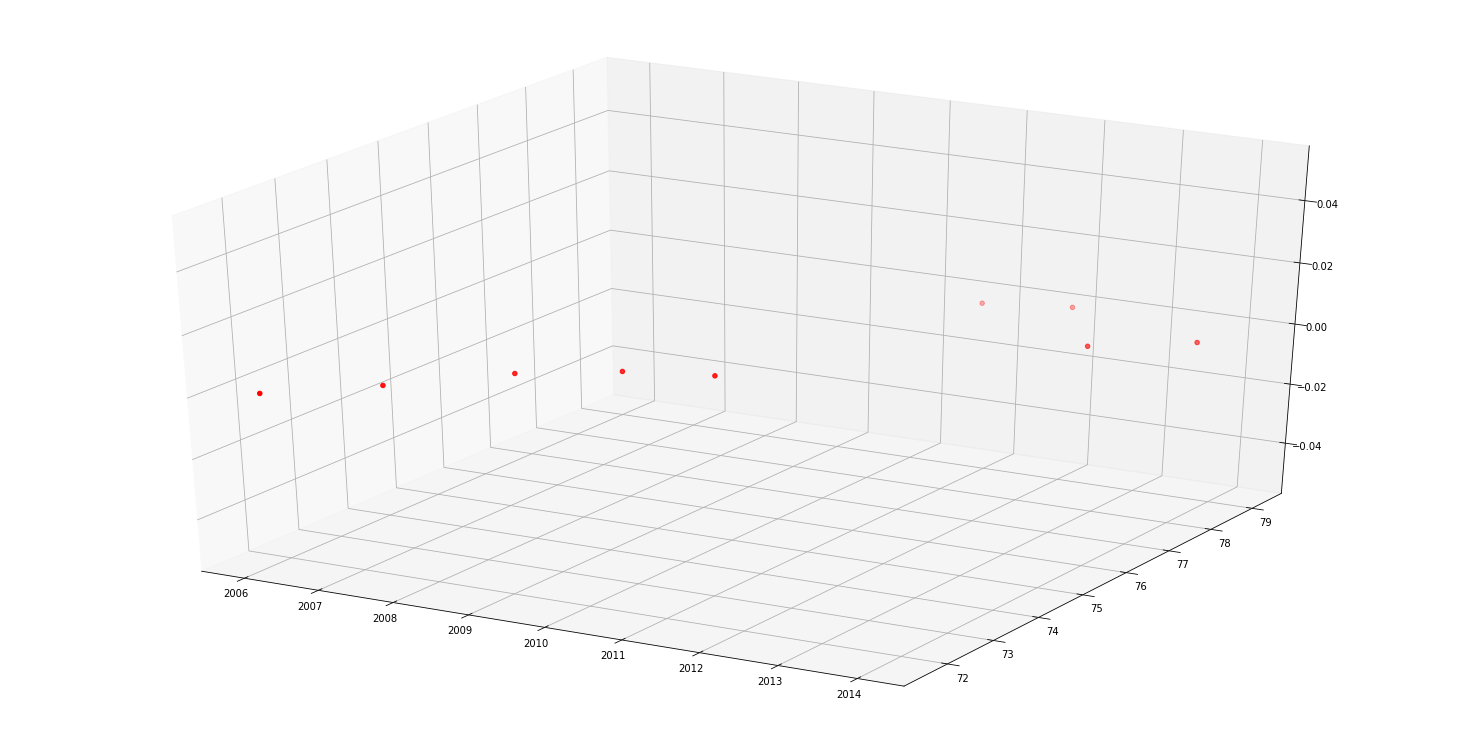

In [127]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year, AQI, color = 'red')
plt.show()

In [128]:
data = data[np.isfinite(data['wqi'])]
data.head()

,year,do,ph,co,bod,na,tc,npH,ndo,nco,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,2006,6.339856,7.247588,1588.241584,13.338644,1.878000,9589.173913,81.568627,85.294118,41.764706,83.333333,30.392157,95.882353,13.458824,23.967647,19.500000,0.273529,2.684706,11.735882,71.620588
1,2007,6.348276,7.221667,1919.794872,8.295763,1.262653,31240.188073,83.333333,87.666667,39.000000,87.666667,45.000000,81.666667,13.750000,24.634333,20.514000,0.405000,2.286667,10.959000,72.549000
2,2008,6.124051,7.105660,1361.647799,5.594586,1.447862,19774.121795,75.974843,85.786164,46.289308,89.811321,50.817610,91.069182,12.535849,24.105912,21.015849,0.457358,2.549937,13.007296,73.672201
3,2009,6.310912,7.203425,3192.172944,6.532222,2.275198,5099.593567,79.779006,87.624309,44.972376,89.171271,33.922652,97.237569,13.163536,24.622431,20.866077,0.305304,2.722652,12.637238,74.317238
4,2010,6.316277,7.201436,1957.287234,7.670934,1.704828,3586.397661,79.574468,90.531915,45.212766,87.021277,47.021277,92.446809,13.129787,25.439468,20.362979,0.423191,2.588511,12.704787,74.648723


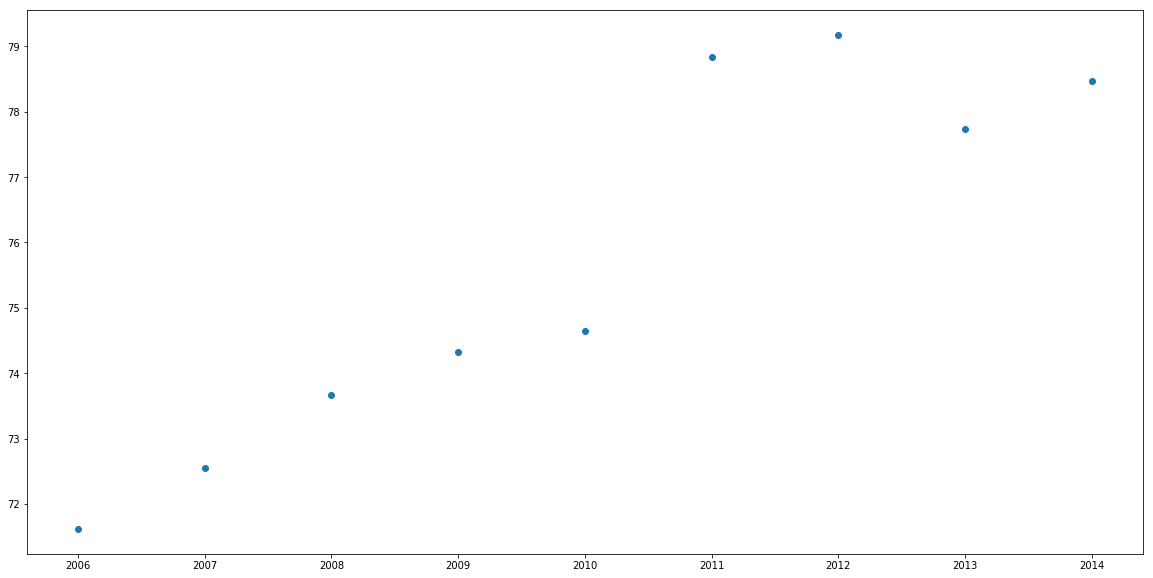

In [129]:
cols = ['year']
y = data['wqi']
x = data[cols]

plt.scatter(x, y)
plt.show()

In [130]:
from sklearn import neighbors, datasets
data = data.reset_index(level = 0, inplace = False)


In [131]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [132]:
cols = ['year']

In [133]:
y = data['wqi']
x = data[cols]

In [134]:
reg = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [135]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [136]:
a = reg.predict(x_test)
a

array([ 74.90622328,  75.87133793])

In [137]:
y_test

3    74.317238
4    74.648723
Name: wqi, dtype: float64

In [138]:
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y_test,a))

mse:0.92


In [139]:
dt = pd.DataFrame({'Actual': y_test, 'Predicted': a})

In [140]:
#using gradient descent to optimize it further
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        , -1.46059349],
       [ 1.        , -1.09544512],
       [ 1.        , -0.73029674],
       [ 1.        , -0.36514837],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.36514837],
       [ 1.        ,  0.73029674],
       [ 1.        ,  1.09544512],
       [ 1.        ,  1.46059349]])

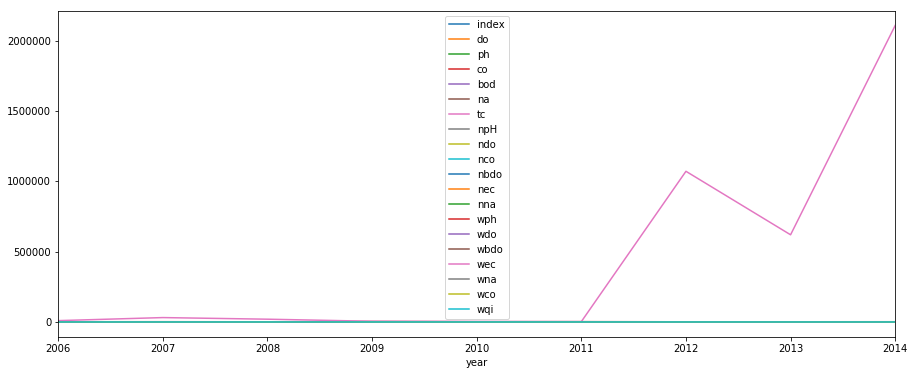

In [141]:
import matplotlib.pyplot as plt
data=data.set_index('year')
data.plot(figsize=(15,6))
plt.show()

In [142]:
alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 75.67, 2.67


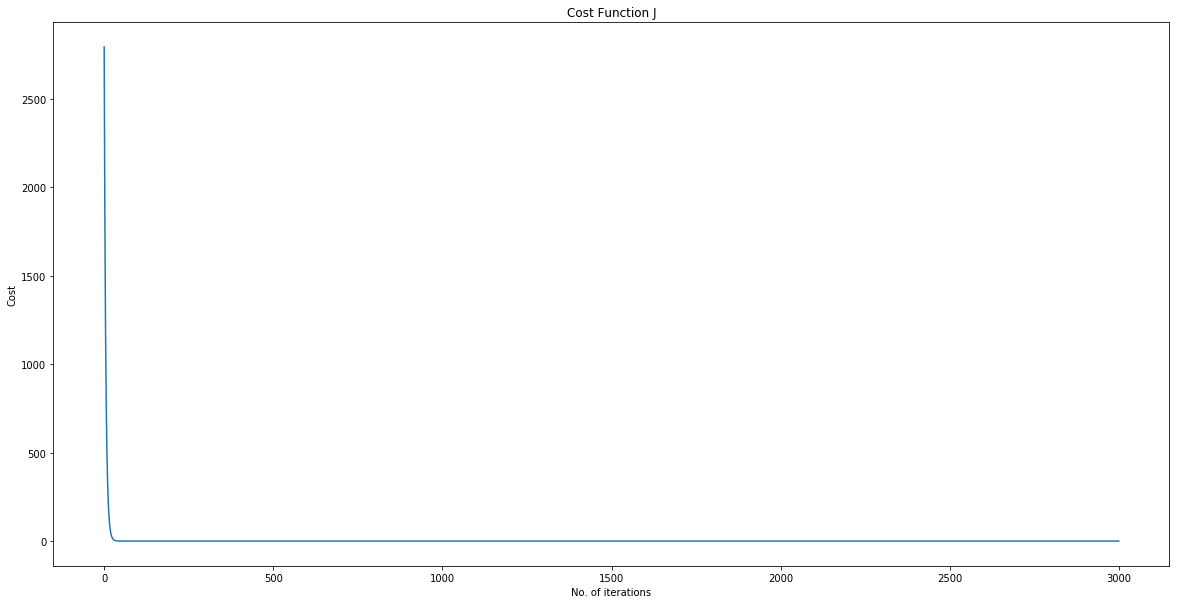

In [143]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [144]:
import numpy as np
newB=[74.76, 2.13]

In [145]:
def rmse(y,y_pred):
    rmse= np.sqrt(sum(y-y_pred))
    return rmse

In [146]:
y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
dt=pd.concat([data, dt], axis=1)


In [147]:
#testing the accuracy of the model

from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))
dt.index


1.49819520631


Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014],
           dtype='int64')

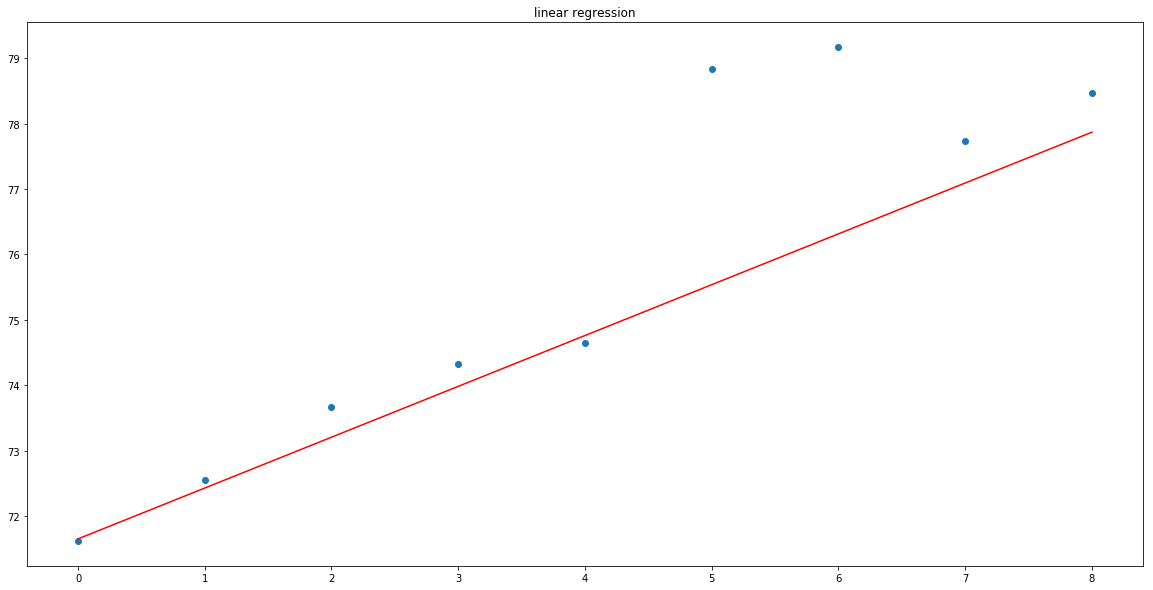

In [148]:
#plotting the actual and predicted results
x_axis=dt.index
y_axis=dt.Actual
y1_axis=dt.Predicted
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')
plt.title("linear regression")

plt.show()